In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
#read csv file
df = pd.read_csv('NAS.csv')

In [3]:
#removing null values
df.dropna(inplace = True)

In [4]:
#checks of there are any null values
df.isna().values.any()

False

In [5]:
#setting index as date and converting it to numbers
df = pd.DataFrame(df, columns=['Date','Close'])
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']
df.index = (df.index - pd.to_datetime('1970-01-01')).days

#setts index date as x and close values as y
y = np.asarray(df['Close']).reshape(-1, 1)
x = np.asarray(df.index.values)

In [6]:
# Split dt into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

y_train = np.asarray(train['Close']).reshape(-1, 1)
x_train = np.asarray(train.index.values).reshape(-1, 1)

y_test = np.asarray(test['Close']).reshape(-1, 1)
x_test = np.asarray(test.index.values).reshape(-1, 1)

In [7]:
#fit train data
model = SVR(kernel='rbf')
model.fit(x_train,y_train)

/Users/christiandyrli/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [8]:
#checks the score of the algoritm
print(model.score(x_test,y_test))

0.8507746683759302


In [9]:
#prediction for the historical dates
y_learned = model.predict(x.reshape(-1, 1))

#prediction for furture dates
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 2000))
y_predict = model.predict(newindex.reshape(-1, 1))

In [10]:
#converting date from numbers back to dates
x = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

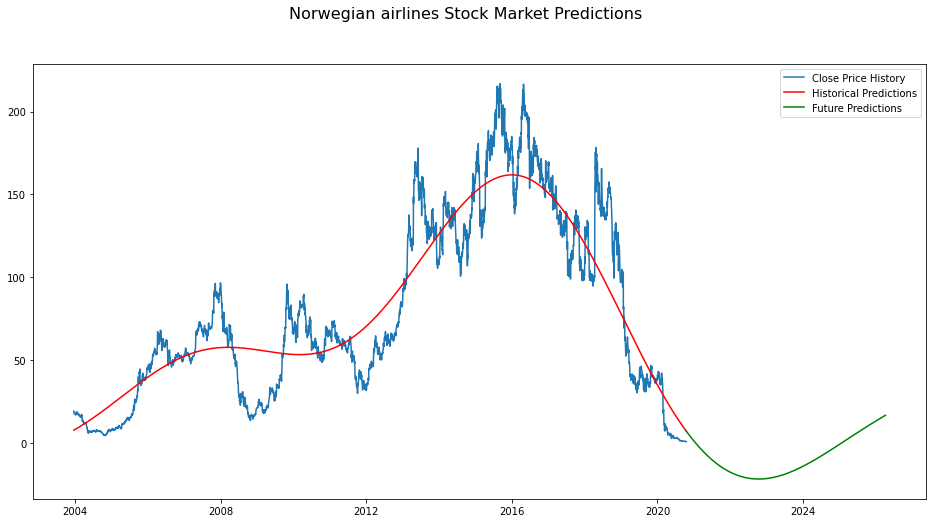

In [11]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')

#Plot the historical data
plt.plot(x,y_learned, color='r', label='Historical Predictions')
plt.suptitle('Norwegian airlines Stock Market Predictions', fontsize=16)

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

fig = plt.gcf()
fig.canvas.set_window_title('Norwegian airlines Stock Market Predictions')

plt.legend()
plt.show()

In [12]:
#Predict a spesific date
test = ['2022-02-01']
test = pd.to_datetime(test)
test = (test - pd.to_datetime('1970-01-01')).days
test = np.asarray(test).reshape(-1, 1)
print(model.predict(test))

[-18.66474904]
